In [1]:
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y = True, as_frame = True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [13]:
y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [15]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
y.isnull().sum()

0

In [18]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [17]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [51]:
import pandas as pd
mydf = pd.concat([X_train, y_train], axis = 1)
mydf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
29,4.7,3.2,1.6,0.2,0
98,5.1,2.5,3.0,1.1,1
37,4.9,3.6,1.4,0.1,0
5,5.4,3.9,1.7,0.4,0
81,5.5,2.4,3.7,1.0,1
...,...,...,...,...,...
22,4.6,3.6,1.0,0.2,0
57,4.9,2.4,3.3,1.0,1
134,6.1,2.6,5.6,1.4,2
143,6.8,3.2,5.9,2.3,2


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

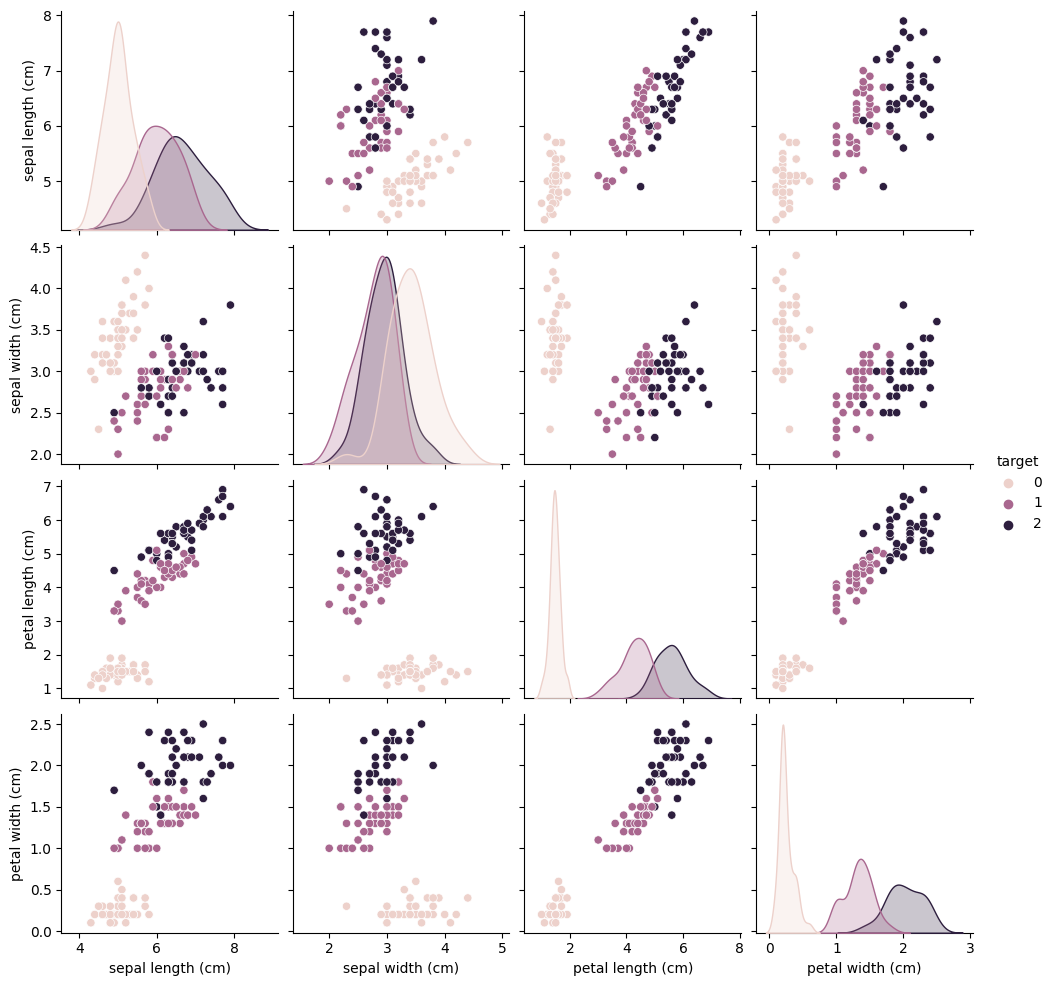

In [52]:
sns.pairplot(mydf, hue = 'target')

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
import numpy as np

In [63]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [64]:
predictions = knn.predict(X_new)
print(predictions)

[0]


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
predictions_2 = knn.predict(X_test)
print(predictions_2)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]


In [68]:
print(np.mean(predictions_2 == y_test))

0.9666666666666667


In [69]:
print(knn.score(X_test, y_test))

0.9666666666666667


In [70]:
from sklearn.metrics import r2_score

In [71]:
r2_score(y_test, predictions_2)

0.944954128440367

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(random_state=17)

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [76]:
predictions_3 = rf.predict(X_test)

In [77]:
r2_score(y_test, predictions_3)

0.944954128440367

In [78]:
from sklearn.pipeline import make_pipeline

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression())

In [82]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(pipe.predict(X_test), y_test)

0.9666666666666667